In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
class KMeans:
    def __init__(self,k,n_data):
        self.__centroids = np.random.rand(k,n_data)
        self.__centroidsList = [[] for _ in range(k)]
        self.k,self.n_data = k,n_data

    def __distance(self,data,centroid):
        dist = 0
        for i,j in zip(data,centroid):
            dist += np.abs(i-j)
        return dist
    
    def __getIndex(self,data):
        index = -1
        minDist = np.inf
        for i in range(self.k):
            dist = self.__distance(data,self.__centroids[i])
            if(dist<minDist):
                minDist = dist
                index = i
        return index
    
    def classify(self,data):    
        self.__centroidsList[self.__getIndex(data)].append(data)
        self.__updateCentroids()
        self.__changeData()
        return self.__getIndex(data)

    def __updateCentroids(self):
        for i in range(self.k):
            itens = self.__centroidsList[i]
            if len(itens):
                self.__centroids[i] = np.zeros(self.n_data)
                for data in itens:
                    self.__centroids[i] += data/len(itens)
    
    def __changeData(self):
        for i in range(self.k):
            n = 0
            for data in self.__centroidsList[i]:
                index = self.__getIndex(data)
                if index != i:
                    del self.__centroidsList[i][n]
                    self.__centroidsList[index].append(data)
                else:
                    n+=1
        self.__updateCentroids()

    def addData(self, data):
        add = True
        for x in data:
            add = True
            for j in range(self.k):
                if not len(self.__centroidsList[j]):
                    self.__centroids[j] = x
                    self.__centroidsList[j].append(x)
                    add = False
            if add:
                self.classify(x)
    def getList(self,index):
        return self.__centroidsList[index]             
            

In [3]:
cluster = KMeans(3,2)
features, true_labels = make_blobs(
    n_samples=100,
    centers=3,
    cluster_std=2.75,
    random_state=42
    )
cluster.addData(features)

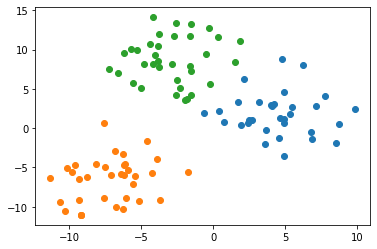

In [4]:
plt.figure()
for i in range(3):
    data = cluster.getList(i)
    x,y = [],[]
    for j in data:
        x.append(j[0])
        y.append(j[1])
    plt.plot(x,y,"o")